<a href="https://colab.research.google.com/github/Mansi-pradhan/2510310_MansiPradhan/blob/main/2510310_MansiPradhan_Assignment3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/census.csv")

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

In [7]:
print("Dataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

Missing Values:
 age               0
workclass         0
fnlwgt         

In [8]:
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']

print("\nNumeric Summary:\n", df[numeric_cols].describe())
print("\nCategorical Summary:\n", df[categorical_cols].describe())


Numeric Summary:
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Categorical Summary:
        workclass educ

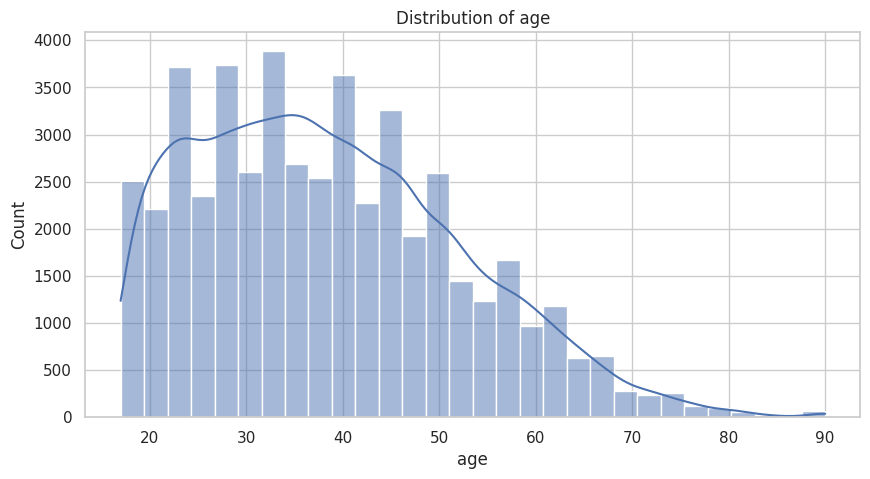

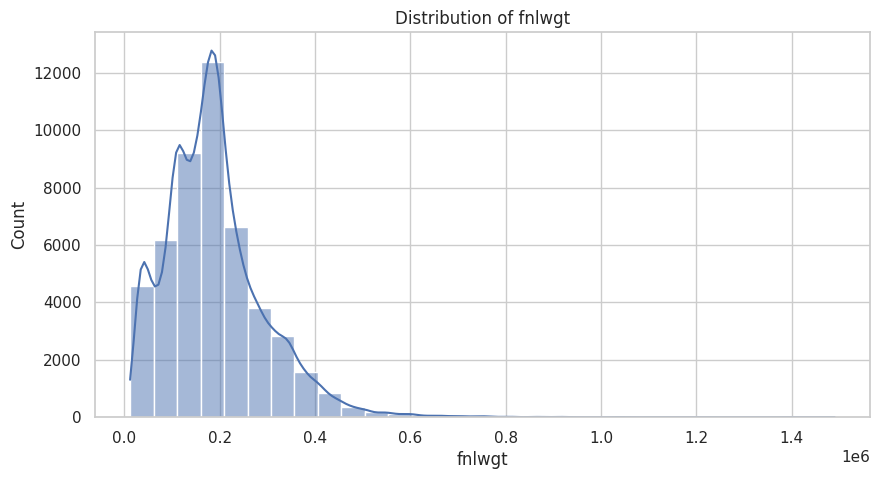

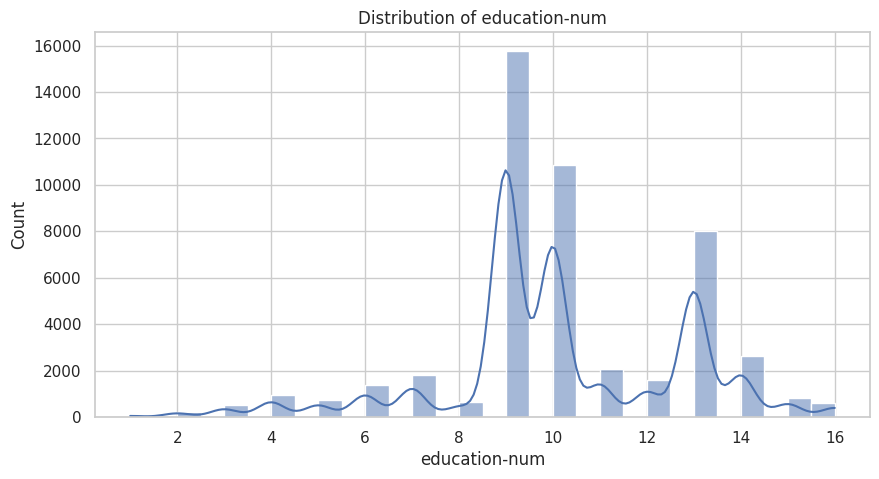

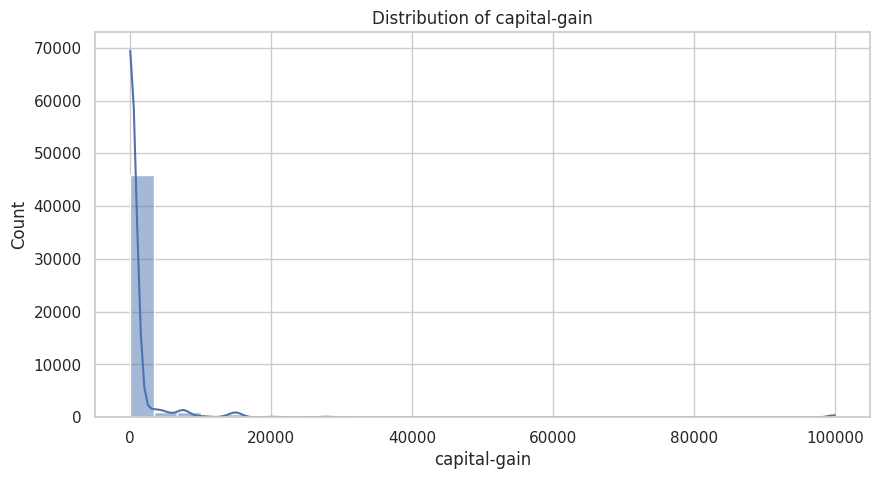

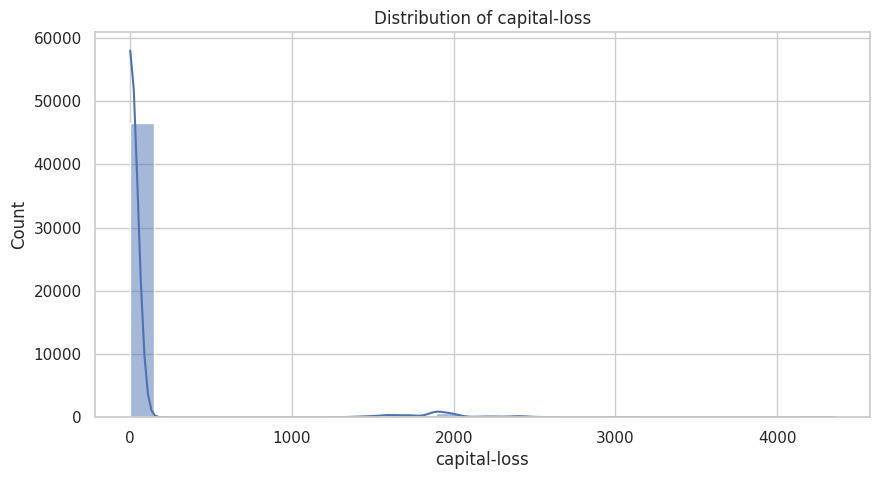

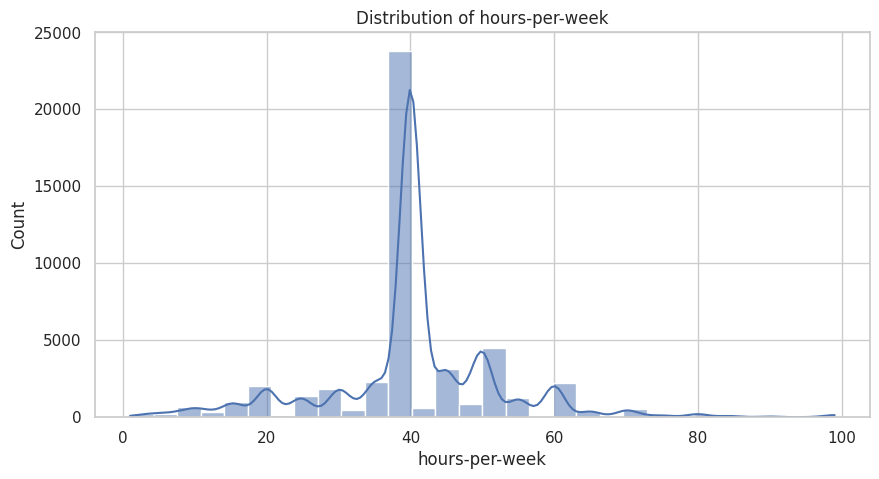

In [9]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

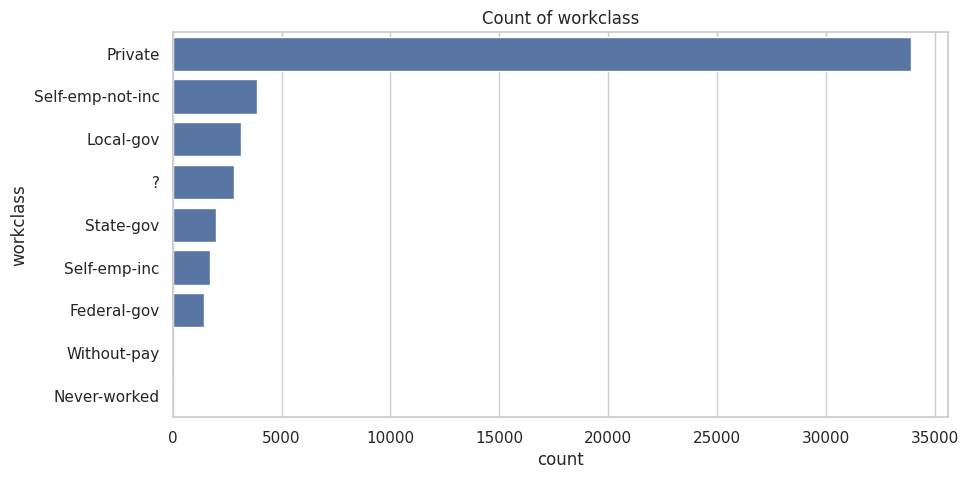

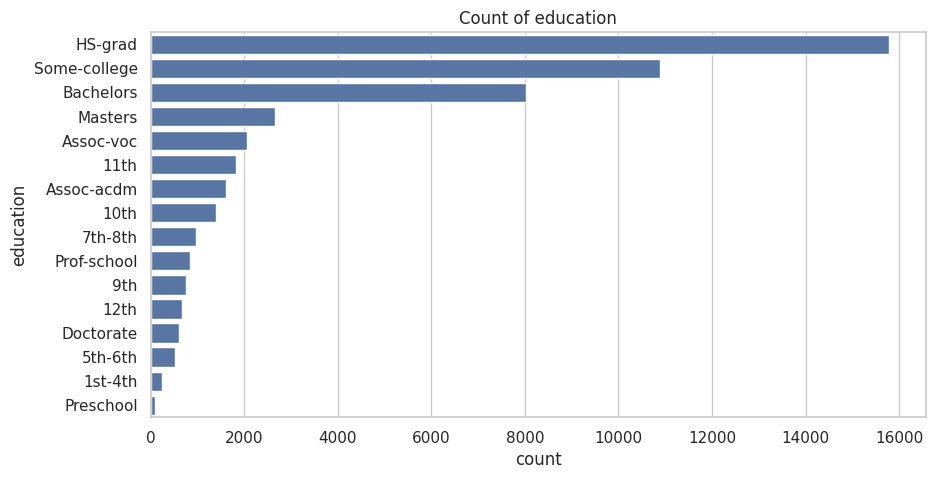

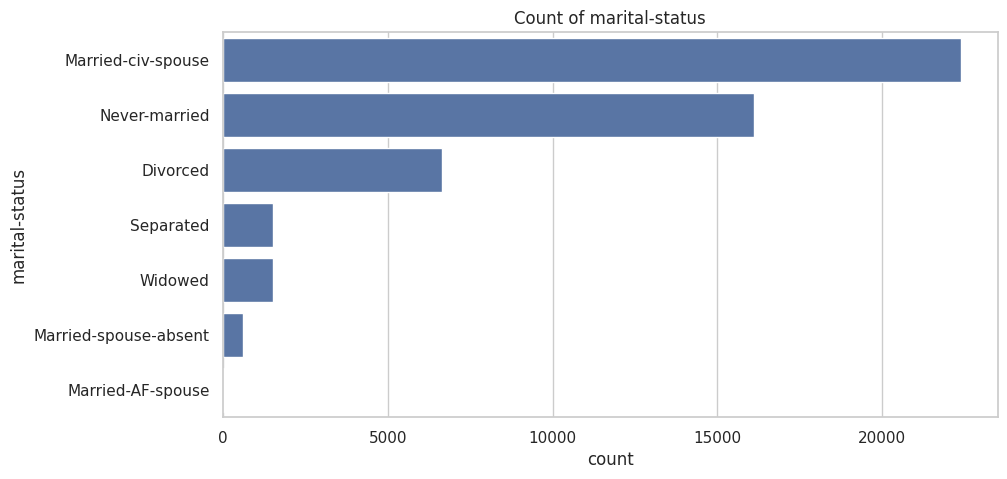

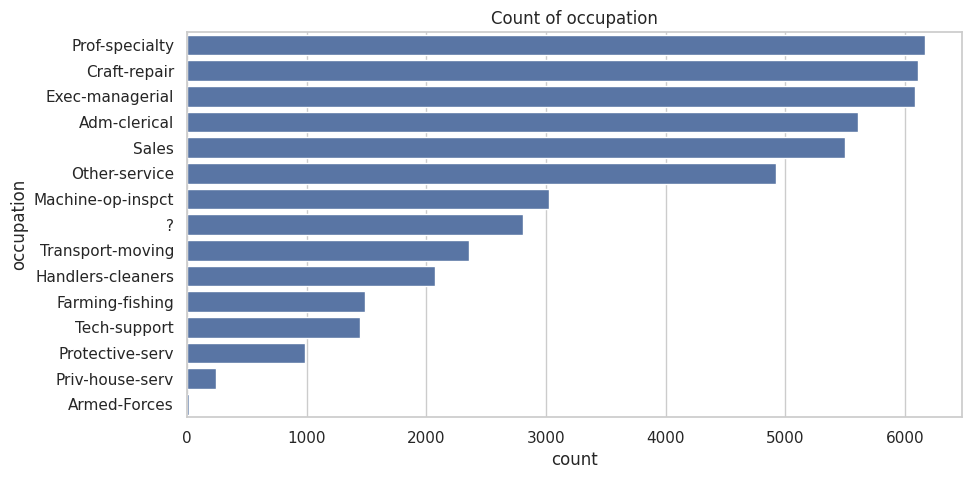

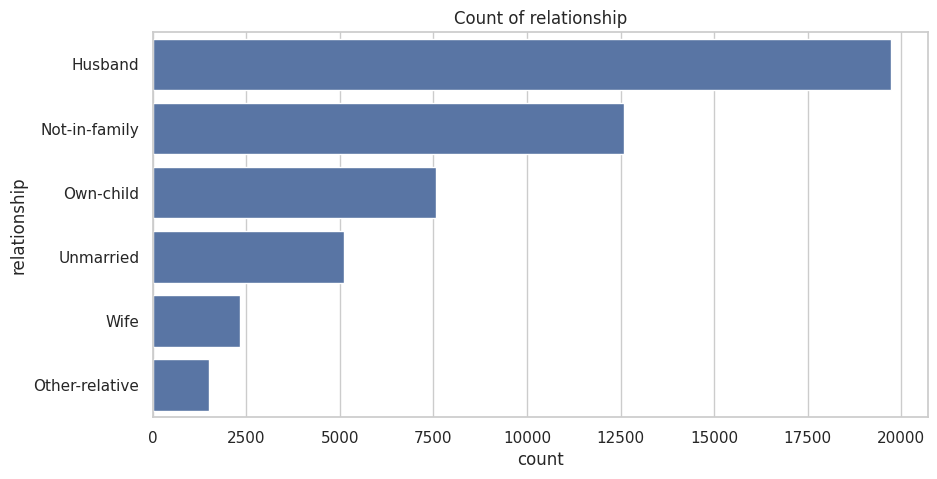

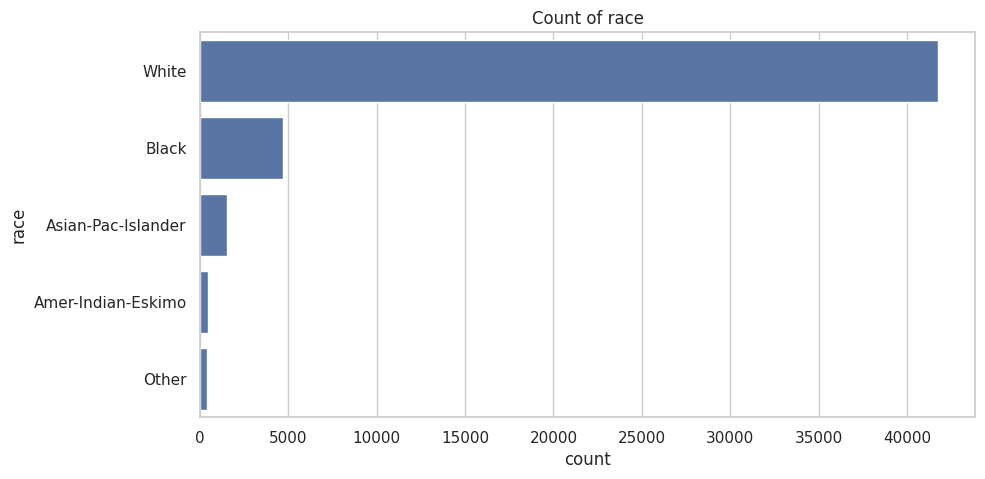

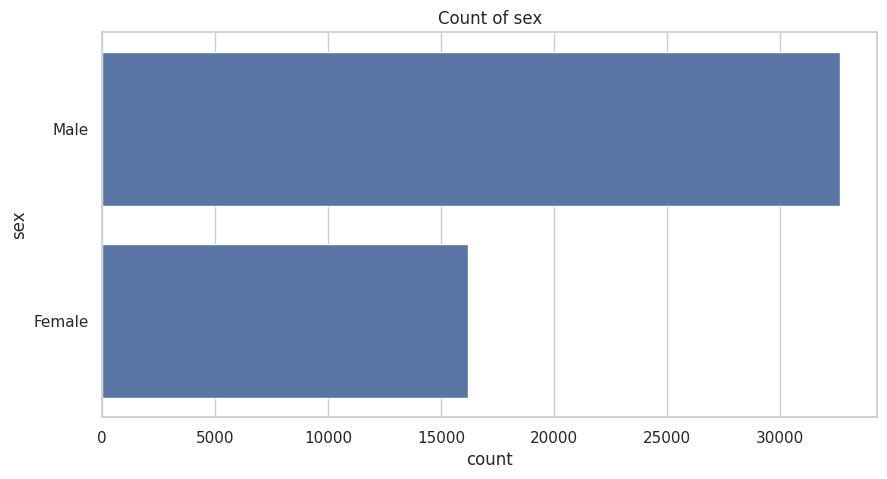

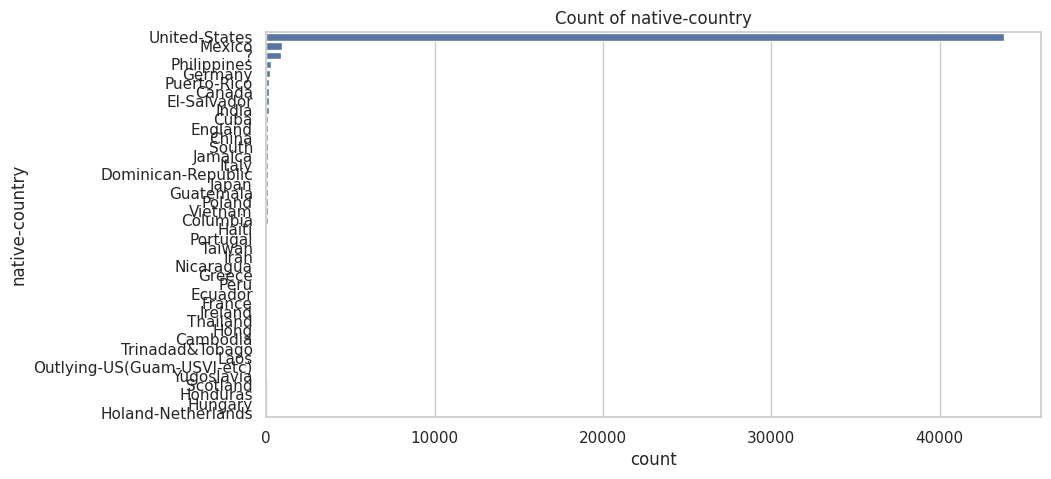

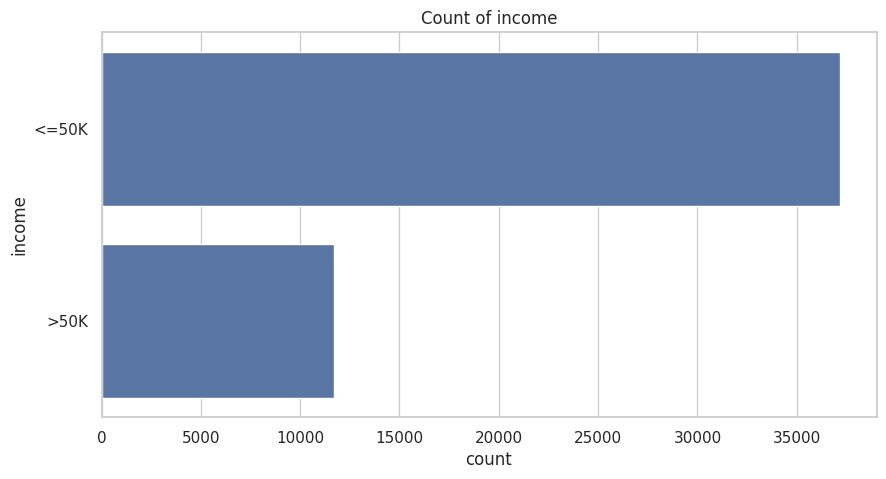

In [10]:
for col in categorical_cols:
    plt.figure()
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

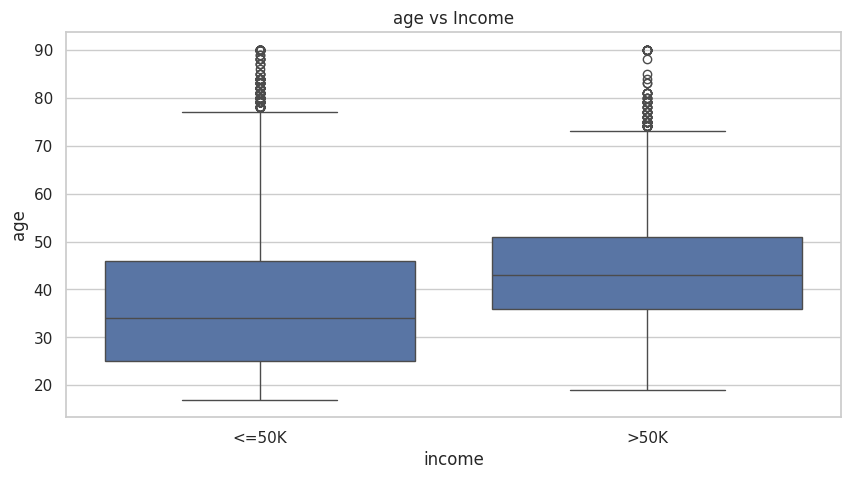

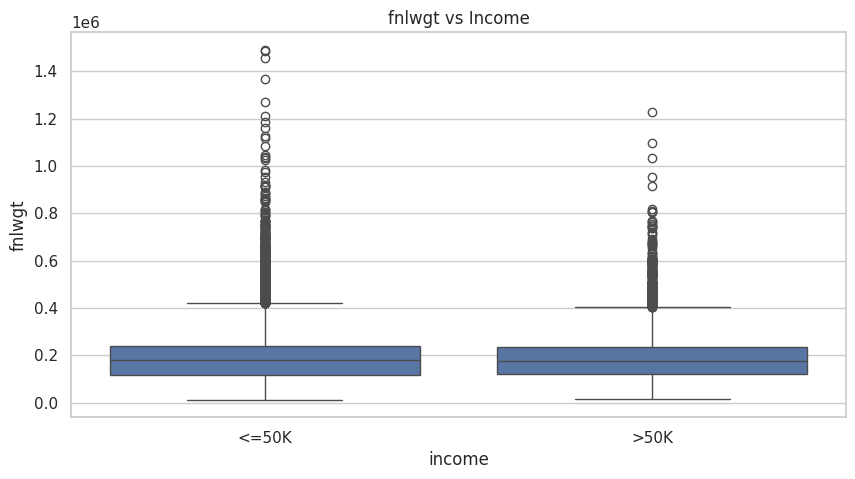

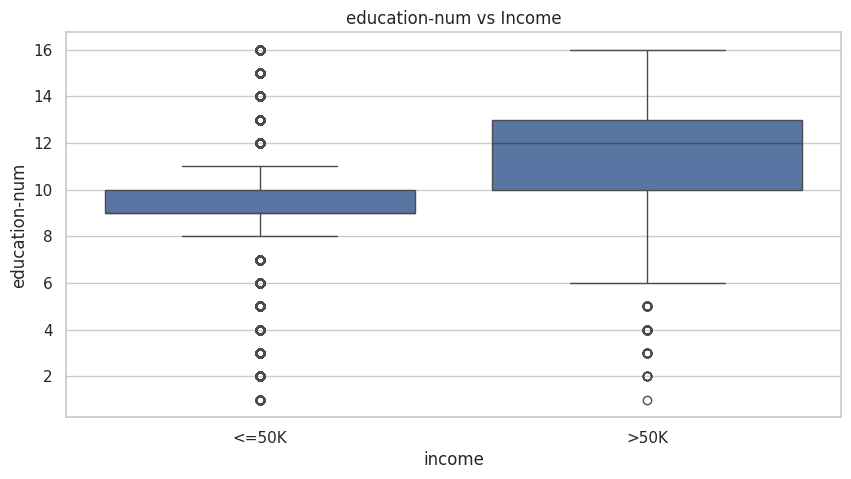

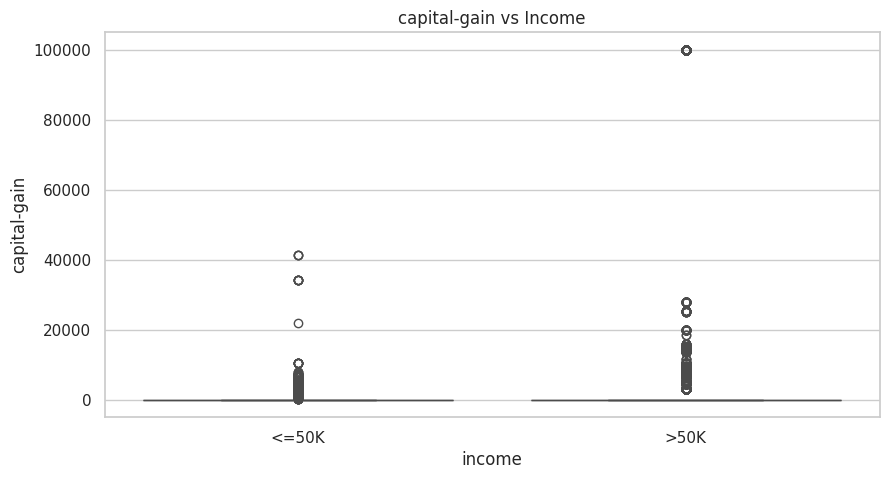

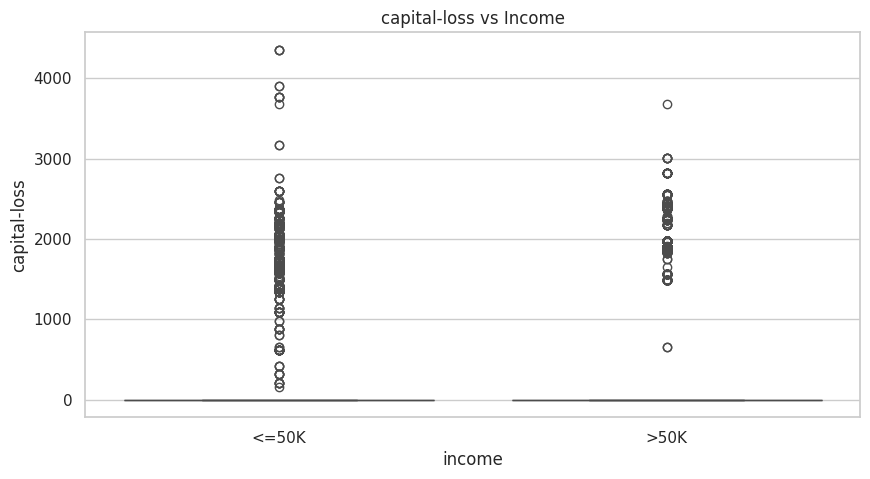

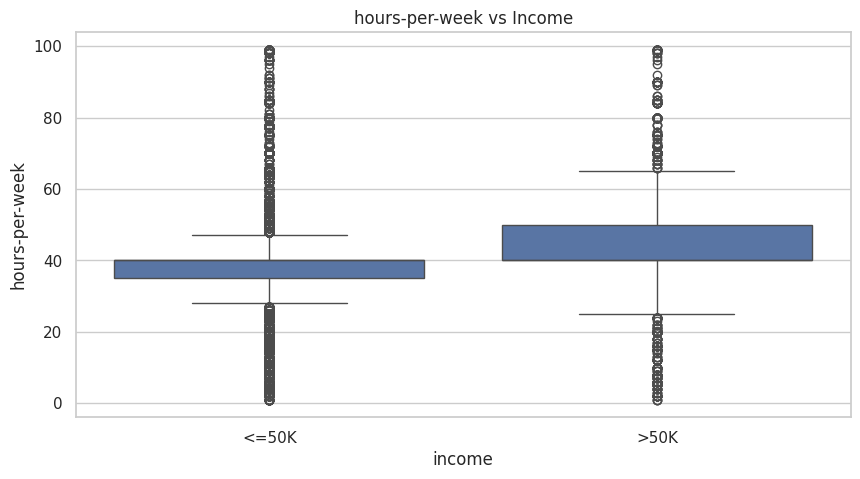

In [11]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f'{col} vs Income')
    plt.show()

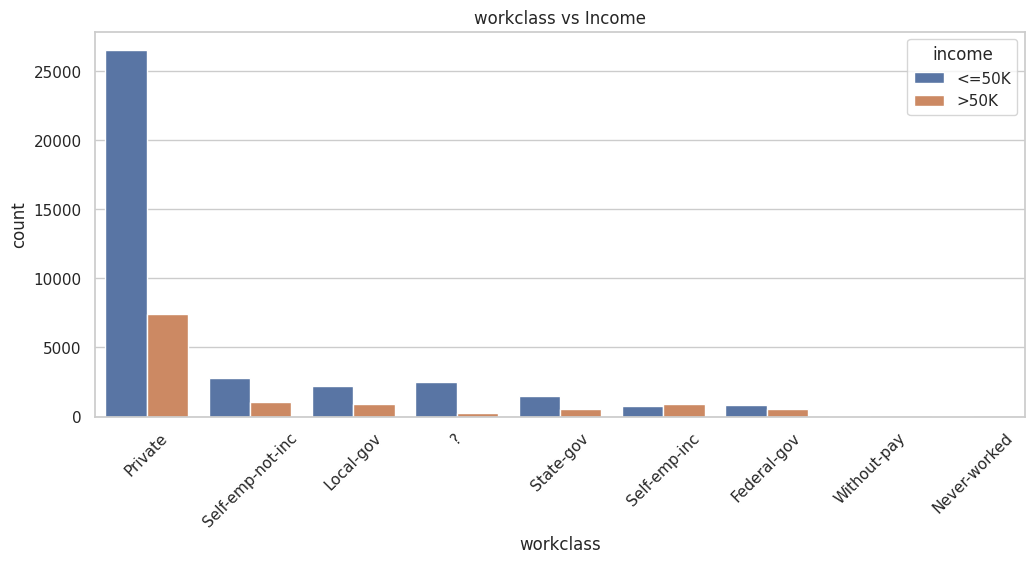

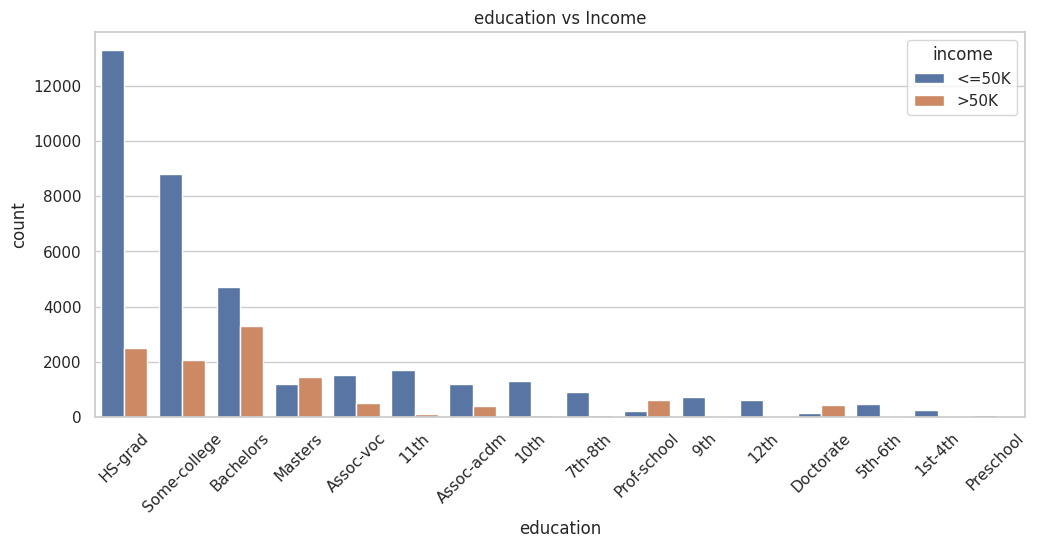

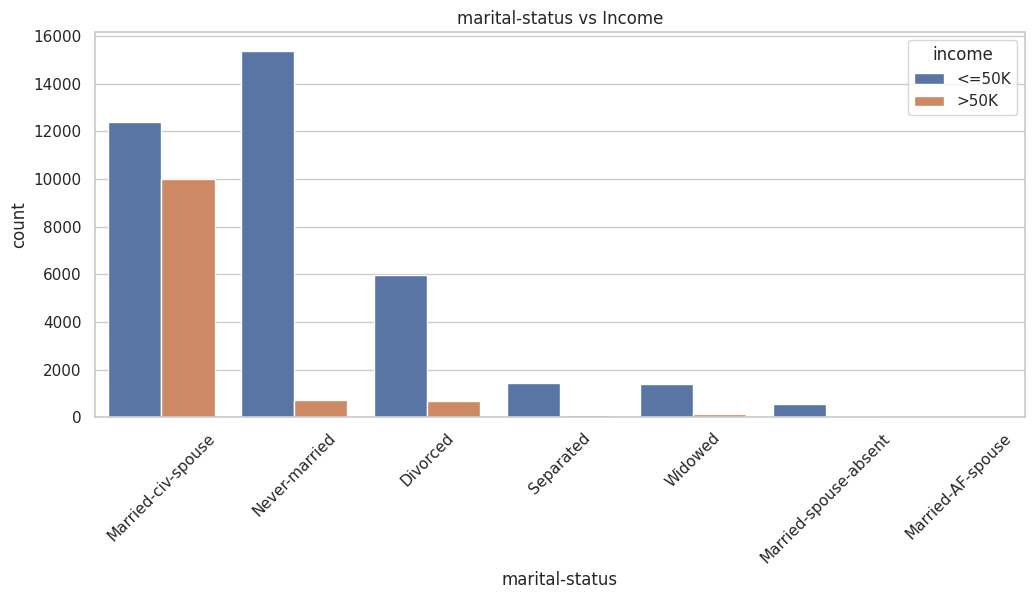

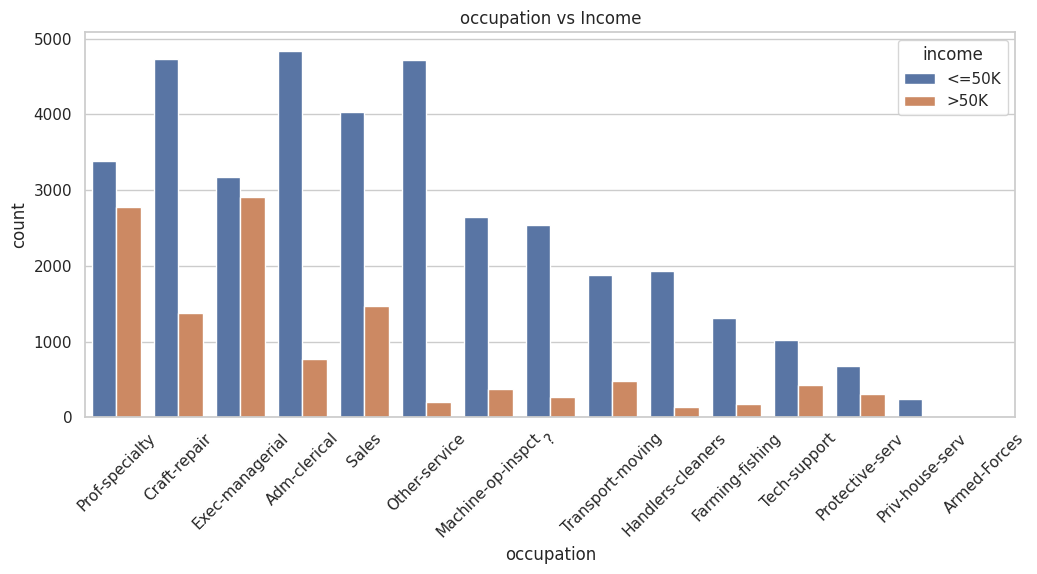

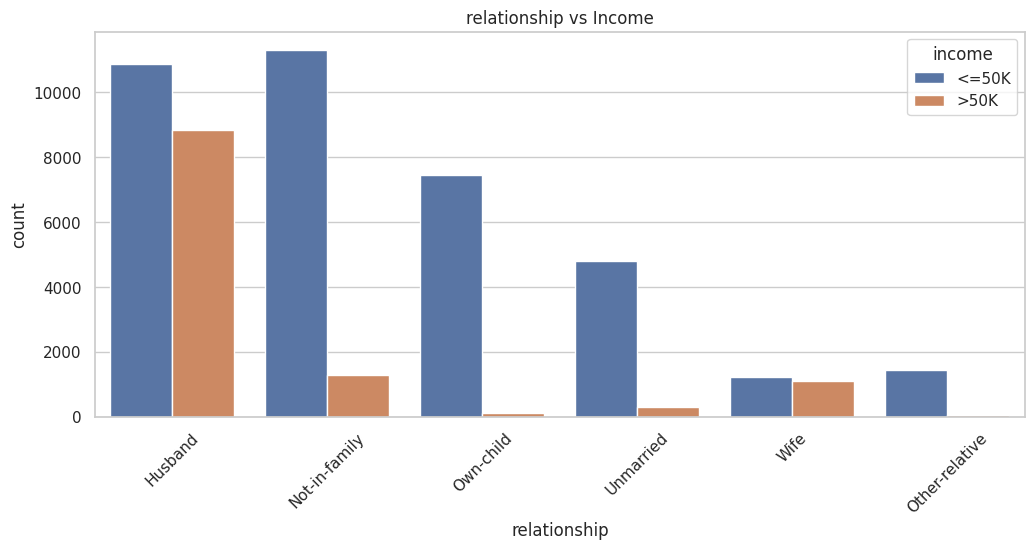

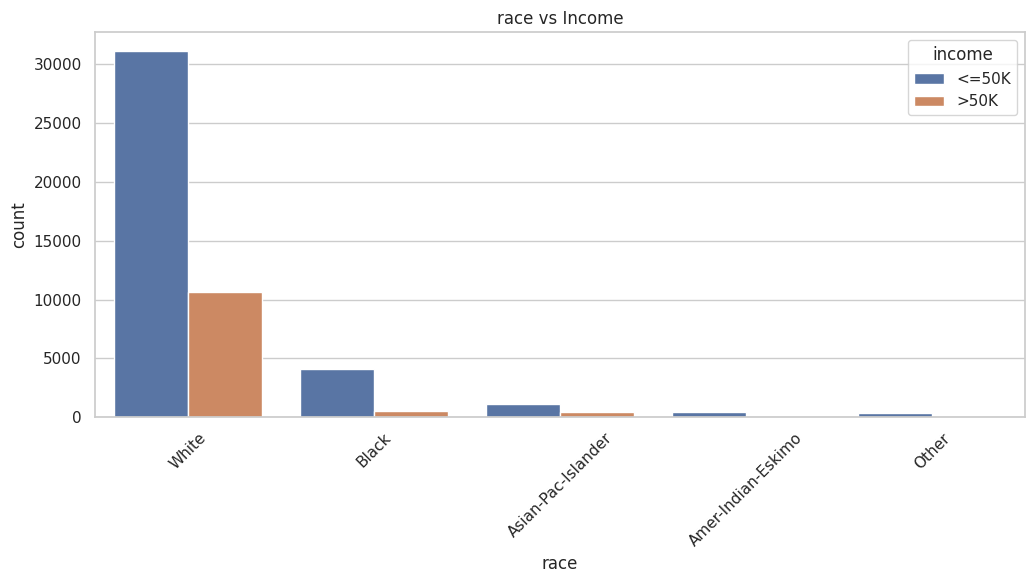

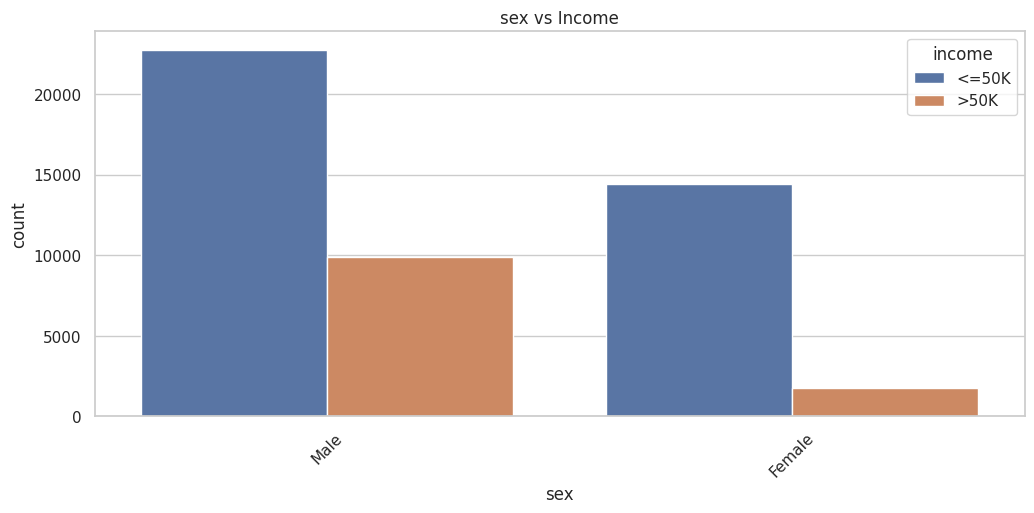

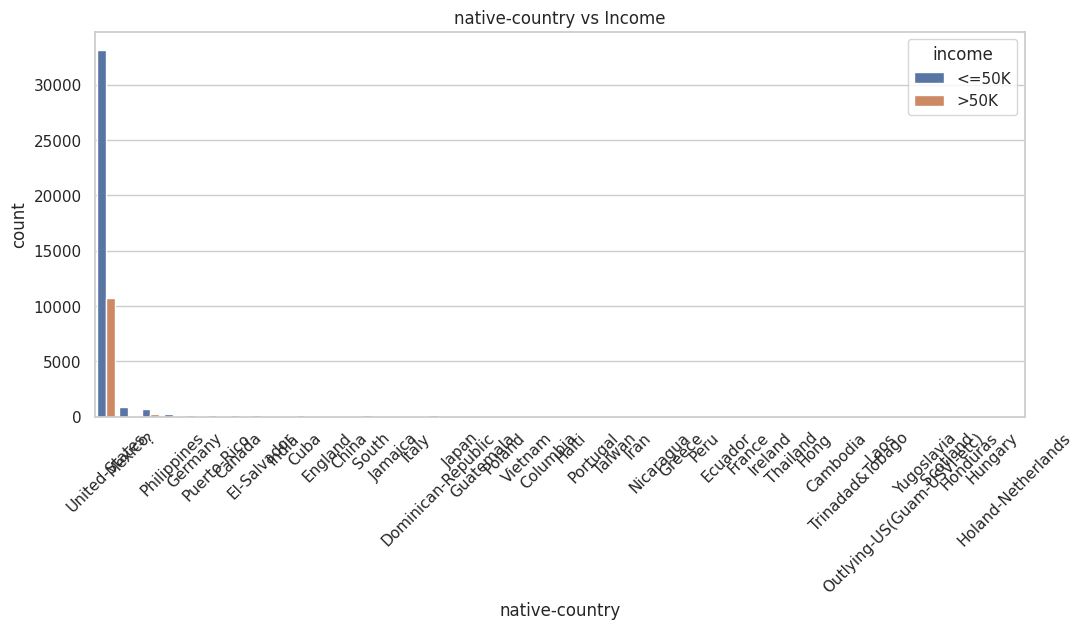

In [12]:
for col in categorical_cols[:-1]:  # exclude target
    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=col, hue='income', order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Income')
    plt.show()

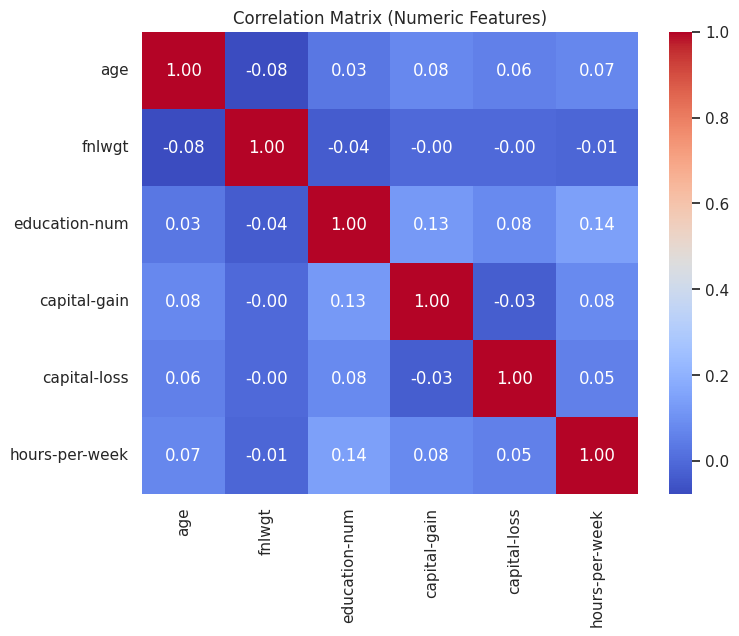

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

In [14]:
income_counts = df['income'].value_counts()
income_ratio = df['income'].value_counts(normalize=True)
print("\nIncome Counts:\n", income_counts)
print("\nIncome Distribution (%):\n", income_ratio)


Income Counts:
 income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Income Distribution (%):
 income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64


In [15]:
for col in ['capital-gain', 'capital-loss']:
    zeros = (df[col]==0).sum()
    print(f"{col} zeros: {zeros} ({zeros/len(df)*100:.2f}%)")

capital-gain zeros: 44807 (91.74%)
capital-loss zeros: 46560 (95.33%)


In [16]:
X = df.drop('income', axis=1)
y = df['income']

In [17]:
y = y.map({'<=50K': 0, '>50K': 1})

In [18]:
numeric_cols = ['age', 'fnlwgt', 'education-num',
                'capital-gain', 'capital-loss', 'hours-per-week']

categorical_cols = ['workclass', 'education', 'marital-status',
                    'occupation', 'relationship', 'race',
                    'sex', 'native-country']

In [19]:
skewed_cols = ['capital-gain', 'capital-loss']
X[skewed_cols] = np.log1p(X[skewed_cols])

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [24]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [25]:
X_train_processed.shape, X_test_processed.shape


((39073, 108), (9769, 108))

In [26]:
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numeric_cols + list(cat_features)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
log_reg = LogisticRegression(max_iter=1000)

In [29]:
log_reg.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred_lr = log_reg.predict(X_test_processed)

In [31]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8481932644078206
[[6907  524]
 [ 959 1379]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7431
           1       0.72      0.59      0.65      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

In [34]:
rf.fit(X_train_processed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [35]:
y_pred_rf = rf.predict(X_test_processed)

In [36]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8579179035725253
[[6919  512]
 [ 876 1462]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7431
           1       0.74      0.63      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression(max_iter=1000)

In [39]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

In [40]:
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [41]:
lr_grid.fit(X_train_processed, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1')

In [42]:
best_lr = lr_grid.best_estimator_

print("Best Logistic Regression Params:", lr_grid.best_params_)

Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [43]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_lr_tuned = best_lr.predict(X_test_processed)

print("Tuned Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr_tuned))
print(classification_report(y_test, y_pred_lr_tuned))


Tuned Logistic Regression Accuracy: 0.8481932644078206
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7431
           1       0.72      0.59      0.65      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

rf_grid.fit(X_train_processed, y_train)

best_rf = rf_grid.best_estimator_

print("Best Random Forest Params:", rf_grid.best_params_)


Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [45]:
y_pred_rf_tuned = best_rf.predict(X_test_processed)

print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))



Tuned Random Forest Accuracy: 0.8689732828334528
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7431
           1       0.78      0.62      0.70      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [53]:
lr_l1 = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.1,
    max_iter=1000
)

lr_l1.fit(X_train_processed, y_train)


LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [54]:
lr_coef = pd.Series(
    lr_l1.coef_[0],
    index=all_features
)

lr_selected = lr_coef[lr_coef != 0].abs().sort_values(ascending=False)

print("Number of selected LR features:", len(lr_selected))
print(lr_selected.head(15))


Number of selected LR features: 43
marital-status_Married-civ-spouse    1.617878
relationship_Wife                    1.082574
occupation_Other-service             0.886018
occupation_Farming-fishing           0.873105
relationship_Own-child               0.761795
occupation_Exec-managerial           0.738622
education-num                        0.736351
occupation_?                         0.710616
occupation_Handlers-cleaners         0.690940
sex_Female                           0.660311
marital-status_Never-married         0.552146
relationship_Other-relative          0.508140
capital-gain                         0.502013
workclass_Federal-gov                0.501872
workclass_Self-emp-not-inc           0.475897
dtype: float64


In [55]:
lr_selected_cols = lr_selected.index.tolist()

lr_indices = [all_features.index(f) for f in lr_selected_cols]

X_train_lr_fs = X_train_processed[:, lr_indices]
X_test_lr_fs  = X_test_processed[:, lr_indices]


In [56]:
best_lr.fit(X_train_lr_fs, y_train)
y_pred_lr_fs = best_lr.predict(X_test_lr_fs)

print("Logistic Regression after Feature Selection")
print(classification_report(y_test, y_pred_lr_fs))


Logistic Regression after Feature Selection
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7431
           1       0.72      0.59      0.65      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [58]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
rf_importance = pd.Series(
    best_rf.feature_importances_,
    index=all_features
).sort_values(ascending=False)

print(rf_importance.head(15))


capital-gain                         0.129866
marital-status_Married-civ-spouse    0.115717
education-num                        0.098805
age                                  0.097582
relationship_Husband                 0.065330
fnlwgt                               0.058394
hours-per-week                       0.057306
marital-status_Never-married         0.038703
capital-loss                         0.037437
occupation_Exec-managerial           0.026476
relationship_Not-in-family           0.019855
occupation_Prof-specialty            0.019184
education_Bachelors                  0.017088
sex_Female                           0.014687
relationship_Wife                    0.013778
dtype: float64


In [60]:
TOP_K = 20
rf_selected = rf_importance.head(TOP_K)

rf_selected_cols = rf_selected.index.tolist()


In [61]:
rf_indices = [all_features.index(f) for f in rf_selected_cols]

X_train_rf_fs = X_train_processed[:, rf_indices]
X_test_rf_fs  = X_test_processed[:, rf_indices]


In [62]:
best_rf.fit(X_train_rf_fs, y_train)
y_pred_rf_fs = best_rf.predict(X_test_rf_fs)

print("Random Forest after Feature Selection")
print(classification_report(y_test, y_pred_rf_fs))


Random Forest after Feature Selection
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7431
           1       0.77      0.62      0.69      2338

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


In [64]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,           # L2 regularization
    learning_rate='adaptive',
    max_iter=50,
    random_state=42
)


In [65]:
mlp.fit(X_train_processed, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), learning_rate='adaptive',
              max_iter=50, random_state=42)

In [66]:
y_train_pred = mlp.predict(X_train_processed)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:\n",
      classification_report(y_train, y_train_pred))


Training Accuracy: 0.9043073221917949
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     29724
           1       0.84      0.75      0.79      9349

    accuracy                           0.90     39073
   macro avg       0.88      0.85      0.86     39073
weighted avg       0.90      0.90      0.90     39073



In [67]:
y_test_pred = mlp.predict(X_test_processed)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n",
      classification_report(y_test, y_test_pred))


Test Accuracy: 0.8456341488381616
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7431
           1       0.70      0.61      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

